In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Proyectos/Tesis/Similarity')

In [ ]:
data = pd.read_csv("Data/translated_tweets.tsv", sep='\t', lineterminator='\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_str                7077 non-null   int64  
 1   text                  7077 non-null   object 
 2   from_user             7077 non-null   object 
 3   created_at            7077 non-null   object 
 4   user_followers_count  7077 non-null   int64  
 5   user_friends_count    7077 non-null   float64
 6   clean_text            7077 non-null   object 
 7   translated_text       7077 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 442.4+ KB


In [ ]:
import re
import string

#PUNCTUATION_RE = re.compile('[¡!?¿,.:;\']')
PUNCTUATION_RE = re.compile('[^\w\s]')

def clean_text(s):
  ##### NEW #####
  s = ' '.join(list(filter(lambda x: x[0] != '#', s.split())))
  ###############
  s = re.sub(PUNCTUATION_RE, ' ', s)
  #s = s.translate(str.maketrans('','',string.punctuation))
  s = s.lower()
  return s

In [ ]:
data['translated_text'] = data['translated_text'].apply(clean_text)
data['clean_text'] = data['clean_text'].apply(clean_text)

##### NEW #####
#data['translated_text'].replace('', np.nan, inplace=True)
#data['clean_text'].replace('', np.nan, inplace=True)
#data['translated_text'].replace(' ', np.nan, inplace=True)
#data['clean_text'].replace(' ', np.nan, inplace=True)
#data = data.dropna()
###############
data.head()

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text
0,1453511771793371139,#ParoNacional ay está lindo el paro #NoAlParo ...,cacaguate2021,2021-10-27 18:59:45+00:00,82,139.0,paro nacional ay está lindo el paro no al paro...,national unemployment the unemployment is nic...
1,1453511632521502721,@wilfridolaz La gente sabe !! La gente entiend...,Fernand10517208,2021-10-27 18:59:12+00:00,172,328.0,la gente sabe la gente entiende que tu er...,the people knows people understand that ...
2,1453511317394968576,¡Que belleza! Deja ordenando que le archiven ...,maferlarreaf,2021-10-27 18:57:57+00:00,565,363.0,que belleza deja ordenando que le archiven l...,that beauty he leaves ordering that the inves...
3,1453511181805752330,"@LassoGuillermo Si, pero vaya a la @AsambleaEc...",alexazo,2021-10-27 18:57:25+00:00,305,305.0,guillermo lasso si pero vaya a la asamblea ec...,guillermo lasso yes but go to the ecuadorian ...
4,1453511169981956099,"Tan falsa esta nota, porque el pasado, el pres...",nespinosaa,2021-10-27 18:57:22+00:00,945,635.0,tan falsa esta nota porque el pasado el pres...,so false this note because the past the pres...


# Word Embeddings

In [ ]:
import gensim

google_embeddings = gensim.models.KeyedVectors.load_word2vec_format('Data/SBW-vectors-300-min5.bin.gz',binary=True)
#google_embeddings = gensim.models.KeyedVectors.load_word2vec_format('Data/GoogleNews-vectors-negative300.bin.gz',binary=True)

In [ ]:
def tweets_to_vec(tweet, embeddings, dim=300):

    result = np.zeros(dim)
    cnt = 0
    words = tweet.split()
    for word in words:
        if word in embeddings:
            result += np.array(embeddings[word])
            cnt += 1
    if cnt != 0:
        result /= cnt
    return list(result)

In [ ]:
data['vec'] = data['clean_text'].apply(tweets_to_vec, args=[google_embeddings])
#data['vec'] = data['translated_text'].apply(tweets_to_vec, args=[google_embeddings])
data.head()

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text,vec,clusters
0,1453511771793371139,#ParoNacional ay está lindo el paro #NoAlParo ...,cacaguate2021,2021-10-27 18:59:45+00:00,82,139.0,paro nacional ay está lindo el paro no al paro...,national unemployment the unemployment is nic...,"[-0.10658185137435794, -0.10355952673126012, 0...",0
1,1453511632521502721,@wilfridolaz La gente sabe !! La gente entiend...,Fernand10517208,2021-10-27 18:59:12+00:00,172,328.0,la gente sabe la gente entiende que tu er...,the people knows people understand that ...,"[-0.04226909261196852, -0.12904876619577407, 0...",0
2,1453511317394968576,¡Que belleza! Deja ordenando que le archiven ...,maferlarreaf,2021-10-27 18:57:57+00:00,565,363.0,que belleza deja ordenando que le archiven l...,that beauty he leaves ordering that the inves...,"[-0.04375301399838408, -0.09248300750528424, 0...",0
3,1453511181805752330,"@LassoGuillermo Si, pero vaya a la @AsambleaEc...",alexazo,2021-10-27 18:57:25+00:00,305,305.0,guillermo lasso si pero vaya a la asamblea ec...,guillermo lasso yes but go to the ecuadorian ...,"[-0.02154537979804445, -0.0927749800030142, 0....",0
4,1453511169981956099,"Tan falsa esta nota, porque el pasado, el pres...",nespinosaa,2021-10-27 18:57:22+00:00,945,635.0,tan falsa esta nota porque el pasado el pres...,so false this note because the past the pres...,"[-0.03721596811327242, -0.041600553356411475, ...",0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(data['vec'].to_list())

In [ ]:
np.savetxt('Data/Similarity_Matrix.txt', similarity_matrix)

In [ ]:
similarity_matrix.shape

(7077, 7077)

In [ ]:
similarity_matrix = np.loadtxt('Data/Similarity_Matrix.txt')

In [ ]:
data['vec'] = data['translated_text'].apply(tweets_to_vec, args=[google_embeddings])
similarity_matrix = cosine_similarity(data['vec'].to_list())

# Metrics

In [ ]:
import random

def data_validation_classification(cosines,tweets):
    total=[]
    for i in range(0,len(cosines)):
        temp=[]
        organized=sorted(cosines[i])

        min1=random.choice(organized[0:30])
        min2=random.choice(organized[0:30])
        max1=random.choice(organized[len(organized)-32:len(organized)-2])

        pos_min_1=organized.index(min1)
        pos_min_2=organized.index(min2)
        pos_max_1=organized.index(max1)

        temp.append(tweets[i])
        if pos_max_1>=i:
            temp.append(tweets[(pos_max_1+1)])
        else:
            temp.append(tweets[pos_max_1])
        if pos_min_1>=i:
            temp.append(tweets[(pos_min_1+1)])
        else:
            temp.append(tweets[pos_min_1])
        if pos_min_2>=i:
            temp.append(tweets[(pos_min_2+1)])
        else:
            temp.append(tweets[pos_min_2])
        total.append(temp)
    return(total)

In [ ]:
data_validation = data_validation_classification(similarity_matrix, data['translated_text'].to_list())
data_validation = pd.DataFrame(data_validation, columns=['tweet','positive', 'negative1', 'negative2'])
data_validation.head()

,tweet,positive,negative1,negative2
0,national unemployment the unemployment is nic...,by siacusin we are already on tuesday stacks ...,attentive ecuadorians do not relax they are ...,national strike ecuador national strike
1,the people knows people understand that ...,paro nacional ecuador backhand index pointing...,national unemployment ecuador national unemplo...,attentive ecuadorians do not relax they are ...
2,that beauty he leaves ordering that the inves...,who benefits from the strike national strike,attentive ecuadorians do not relax they are ...,national unemployment the unemployment is nic...
3,guillermo lasso yes but go to the ecuadorian ...,lasso is a failure lasso liar pandora papers,well people they give me a break from the nat...,
4,so false this note because the past the pres...,"the country is in ""free fall"" lasso is a failure",national unemployment the unemployment is nic...,come on fuck people the people don t give up ...


In [ ]:
def rank_candidates(tweet, candidates, embeddings, dim=300):
    t_vecs = np.array([tweets_to_vec(tweet, embeddings, dim) for i in range(len(candidates))])
    cand_vecs = np.array([tweets_to_vec(candidate, embeddings, dim) for candidate in candidates])
    cosines = np.array(cosine_similarity(t_vecs, cand_vecs)[0])
    merged_list = list(zip(cosines, range(len(candidates)), candidates))
    sorted_list  = sorted(merged_list, key=lambda x: x[0], reverse=True)
    result = [(b,c) for a,b,c in sorted_list]

    return result

In [ ]:
def hits_count(dup_ranks, k):

    return np.average(np.array(dup_ranks) <= np.array([k]))

def dcg_score(dup_ranks, k):

    return np.average((np.array(dup_ranks) <= np.array([k]))*1./(np.log2(1. + np.array(dup_ranks))))

In [ ]:
wv_ranking = []
for line in range(0,len(data_validation)):
    t=data_validation.tweet[line]
    ex=[data_validation.positive[line],data_validation.negative1[line],data_validation.negative2[line]]
    ranks = rank_candidates(t, ex, google_embeddings)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

In [ ]:
for k in [1, 5, 10, 100, 500, 1000]:
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

DCG@   1: 0.243 | Hits@   1: 0.243
DCG@   5: 0.654 | Hits@   5: 1.000
DCG@  10: 0.654 | Hits@  10: 1.000
DCG@ 100: 0.654 | Hits@ 100: 1.000
DCG@ 500: 0.654 | Hits@ 500: 1.000
DCG@1000: 0.654 | Hits@1000: 1.000


# Clustering

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.cluster import KMeans

sns.set_style('whitegrid')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


parameters = {'axes.labelsize': 12,
          'axes.titlesize': 20,
          'xtick.labelsize':12,
          'font.size':12}
plt.rcParams.update(parameters)

In [ ]:
metric = []
n_clusters = range(2,10)

for n in n_clusters:
  kmeans = KMeans(n).fit(similarity_matrix)
  metric.append(kmeans.inertia_)

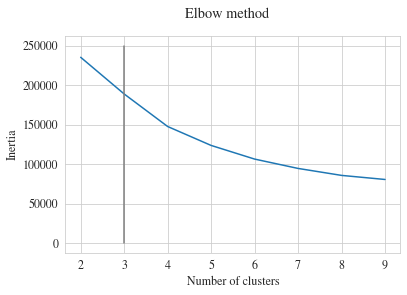

In [ ]:
fig = plt.figure()
plt.plot(n_clusters, metric)
plt.plot([3,3], [0,250000], 'tab:gray')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
fig.suptitle('Elbow method')
fig.savefig('Img/Elbow_spanish.pdf', format='pdf');

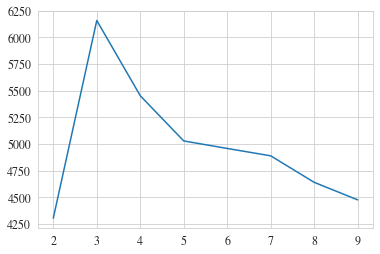

In [ ]:
from sklearn.metrics import calinski_harabasz_score

metric = []
n_clusters = range(2,10)
for n in n_clusters:
  kmeans = KMeans(n).fit_predict(similarity_matrix)
  metric.append(calinski_harabasz_score(similarity_matrix, kmeans))

plt.plot(n_clusters, metric)

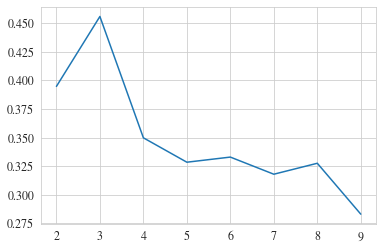

In [ ]:
from sklearn.metrics import silhouette_score

metric = []
n_clusters = range(2,10)
for n in n_clusters:
  kmeans = KMeans(n).fit_predict(similarity_matrix)
  metric.append(silhouette_score(similarity_matrix, kmeans))

plt.plot(n_clusters, metric)

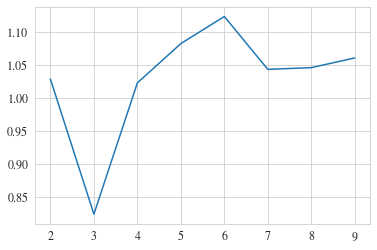

In [ ]:
from sklearn.metrics import davies_bouldin_score

metric = []
n_clusters = range(2,10)
for n in n_clusters:
  kmeans = KMeans(n).fit_predict(similarity_matrix)
  metric.append(davies_bouldin_score(similarity_matrix, kmeans))

plt.plot(n_clusters, metric)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(similarity_matrix)
pca_vec = pca.transform(similarity_matrix)
components = pd.DataFrame(pca_vec, columns=['PC1', 'PC2'])

kmeans = KMeans(3).fit(similarity_matrix)
data['clusters'] = kmeans.labels_
components['clusters'] = data['clusters']
pca.explained_variance_ratio_

array([0.67935761, 0.1901349 ])

In [ ]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.8647182189345111

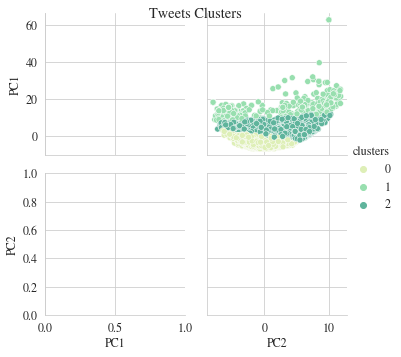

In [ ]:
palette = sns.color_palette(['#DEEFB7', '#98DFAF', '#5FB49C'])#, '#414288'])# '#404590'])
g = sns.PairGrid(components, hue="clusters", palette=palette)
#g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot, levels=4)
g.fig.suptitle('Tweets Clusters')
g.add_legend();
#g.fig.savefig('Img/clusters_spanish.pdf', format='pdf');

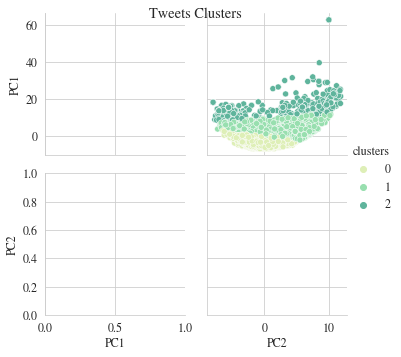

In [ ]:
def set_clusters(c):
  if c == 0:
    return 0
  if c == 1:
    return 2
  if c == 2:
    return 1
  if c == 3:
    return 2

data['clusters'] = data['clusters'].apply(set_clusters)
components['clusters'] = data['clusters']
palette = sns.color_palette(['#DEEFB7', '#98DFAF', '#5FB49C'])#, '#414288',])# '#404590'])
g = sns.PairGrid(components, hue="clusters", palette=palette)
#g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot, levels=4)
g.fig.suptitle('Tweets Clusters')
g.add_legend();
#g.fig.savefig('Img/clusters_spanish.pdf', format='pdf');

In [ ]:
df = pd.DataFrame(pca_vec[:,1], pca_vec[:,0])
df = df.reset_index()
df.columns = ['x', 'y']
df.head()

,x,y
0,0.888189,-3.587483
1,-3.713208,3.466219
2,-5.239420,-1.306413
3,-5.563713,-0.543870
4,-3.971277,-1.368815


In [ ]:
df[(df['y'] >= 9) & (df['x'] >= 50)].head()

,x,y
20,62.792148,10.027384
191,62.792148,10.027384
193,62.792148,10.027384
395,62.792148,10.027384
6041,62.792148,10.027384


In [ ]:
data['clean_text'][20]

' '

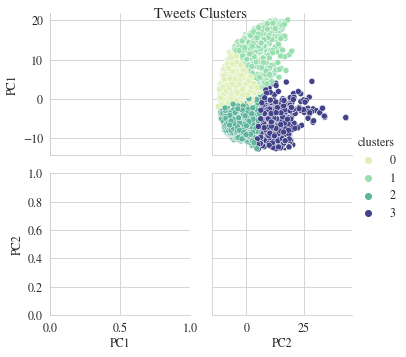

In [ ]:
palette = sns.color_palette(['#DEEFB7', '#98DFAF', '#5FB49C', '#414288'])
g = sns.PairGrid(components, hue="clusters", palette=palette)
#g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot, levels=4)
g.fig.suptitle('Tweets Clusters')
g.add_legend();
#g.fig.savefig('Img/clusters_spanish.pdf', format='pdf');

In [ ]:
def map_clusters(i):
  if i == 0:
    return 0
  if i == 1:
    return 1
  if i == 2:
    return 3
  if i == 3:
    return 2

data['clusters'] = data['clusters'].apply(map_clusters)
components['clusters'] = data['clusters']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(list(data['vec']))
pca_vec = pca.transform(list(data['vec']))
components = pd.DataFrame(pca_vec, columns=['PC1', 'PC2'])

kmeans = KMeans(2).fit(list(data['vec']))
data['clusters'] = kmeans.labels_
components['clusters'] = data['clusters']
pca.explained_variance_ratio_

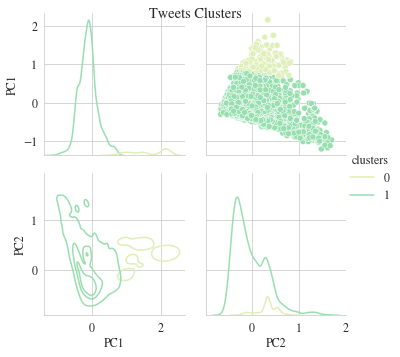

In [ ]:
palette = sns.color_palette(['#DEEFB7', '#98DFAF'])#, '#5FB49C', '#414288'])
g = sns.PairGrid(components, hue="clusters", palette=palette)
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, levels=4)
g.fig.suptitle('Tweets Clusters')
g.add_legend()
g.fig.savefig('Img/clusters_google.pdf', format='pdf');

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


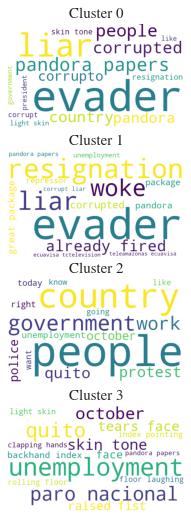

In [ ]:
parameters = {'axes.labelsize': 12,
          'axes.titlesize': 15,
          'xtick.labelsize':12,
          'font.size':12}
plt.rcParams.update(parameters)
stopwords_list = list(stopwords.words('english')) + ['failure', 'Lasso', 'Guillermo', 'National', 'Strike', 'lasso', 'guillermo', 'national', 'strike', 'ecuador', 'Ecuador', 'flexed', 'biceps']

fig, ax = plt.subplots(4,1, figsize=(20,9))
tab1 = data[data["clusters"]==0]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[0].imshow(wordCloud1)
ax[0].set_title('Cluster 0')
ax[0].axis('off')

tab1 = data[data["clusters"]==1]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[1].imshow(wordCloud1)
ax[1].set_title('Cluster 1')
ax[1].axis('off')

tab1 = data[data["clusters"]==2]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[2].imshow(wordCloud1)
ax[2].set_title('Cluster 2')
ax[2].axis('off')

tab1 = data[data["clusters"]==3]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[3].imshow(wordCloud1)
ax[3].set_title('Cluster 3')
ax[3].axis('off')
fig.set_size_inches(20,9)
fig.savefig('Img/wordcloud_english.pdf', format='pdf', dpi=100);

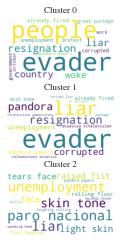

In [ ]:
parameters = {'axes.labelsize': 12,
          'axes.titlesize': 9,
          'xtick.labelsize':12,
          'font.size':12}
plt.rcParams.update(parameters)

stopwords_list = list(stopwords.words('english')) + ['failure', 'Lasso', 'Guillermo', 'National', 'Strike', 'lasso', 'guillermo', 'national', 'strike', 'ecuador', 'Ecuador', 'flexed', 'biceps']

fig, ax = plt.subplots(3,1)
tab1 = data[data["clusters"]==0]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[0].imshow(wordCloud1)
ax[0].set_title('Cluster 0')
ax[0].axis('off')

tab1 = data[data["clusters"]==1]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[1].imshow(wordCloud1)
ax[1].set_title('Cluster 1')
ax[1].axis('off')

tab1 = data[data["clusters"]==2]
allWords = ' '.join([twts for twts in tab1['translated_text']])
wordCloud1 = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119,background_color="white", stopwords=stopwords_list, min_word_length=4, max_words=15).generate(allWords)
ax[2].imshow(wordCloud1)
ax[2].set_title('Cluster 2')
ax[2].axis('off')
#fig.set_size_inches(15,9)
fig.savefig('Img/wordcloud_spanish.pdf', format='pdf', dpi=100);

# Sentiment Analysis

In [ ]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


### TextBlob

In [ ]:
from textblob import TextBlob

data['polarity'] = data['translated_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
data.head()

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text,polarity
0,1453511771793371139,#ParoNacional ay está lindo el paro #NoAlParo ...,cacaguate2021,2021-10-27 18:59:45+00:00,82,139.0,Paro Nacional ay está lindo el paro No al paro...,"National Unemployment, the unemployment is nic...",0.407143
1,1453511632521502721,@wilfridolaz La gente sabe !! La gente entiend...,Fernand10517208,2021-10-27 18:59:12+00:00,172,328.0,La gente sabe !! La gente entiende!! Que tu er...,The people knows !! People understand !! That ...,-0.316667
2,1453511317394968576,¡Que belleza! Deja ordenando que le archiven ...,maferlarreaf,2021-10-27 18:57:57+00:00,565,363.0,¡Que belleza! Deja ordenando que le archiven l...,That beauty! He leaves ordering that the inves...,0.016667
3,1453511181805752330,"@LassoGuillermo Si, pero vaya a la @AsambleaEc...",alexazo,2021-10-27 18:57:25+00:00,305,305.0,"Guillermo Lasso Si, pero vaya a la Asamblea Ec...","Guillermo Lasso Yes, but go to the Ecuadorian ...",0.000000
4,1453511169981956099,"Tan falsa esta nota, porque el pasado, el pres...",nespinosaa,2021-10-27 18:57:22+00:00,945,635.0,"Tan falsa esta nota, porque el pasado, el pres...","So false this note, because the past, the pres...",-0.130000


In [ ]:
data[['id_str', 'clusters']].to_csv('Data/tweets_clusters.tsv', sep='\t', index=False)
data[['id_str', 'polarity']].to_csv('Data/tweets_polarity.tsv', sep='\t', index=False)

In [ ]:
tweets_clusters = pd.read_csv('Data/tweets_clusters.tsv', sep='\t')
tweets_clusters.head()

,id_str,clusters
0,1453511771793371139,3
1,1453511632521502721,0
2,1453511317394968576,2
3,1453511181805752330,0
4,1453511169981956099,2


### NLTK

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def polarity(s):
  sentiment_analizer = SentimentIntensityAnalyzer()
  return sentiment_analizer.polarity_scores(s)['compound']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data['polarity'] = data['translated_text'].apply(polarity)
data.head()

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text,vec,clusters,polarity,Analysis
0,1453511771793371139,#ParoNacional ay está lindo el paro #NoAlParo ...,cacaguate2021,2021-10-27 18:59:45+00:00,82,139.0,paro nacional ay está lindo el paro no al paro...,national unemployment the unemployment is nic...,"[0.1721405029296875, 0.0068115234375, -0.04270...",3,-0.7964,Positive
1,1453511632521502721,@wilfridolaz La gente sabe !! La gente entiend...,Fernand10517208,2021-10-27 18:59:12+00:00,172,328.0,la gente sabe la gente entiende que tu er...,the people knows people understand that ...,"[0.13222249348958334, -0.030459449404761904, -...",0,-0.7650,Negative
2,1453511317394968576,¡Que belleza! Deja ordenando que le archiven ...,maferlarreaf,2021-10-27 18:57:57+00:00,565,363.0,que belleza deja ordenando que le archiven l...,that beauty he leaves ordering that the inves...,"[0.036864367398348724, 0.024722316048362038, 0...",2,0.6908,Positive
3,1453511181805752330,"@LassoGuillermo Si, pero vaya a la @AsambleaEc...",alexazo,2021-10-27 18:57:25+00:00,305,305.0,guillermo lasso si pero vaya a la asamblea ec...,guillermo lasso yes but go to the ecuadorian ...,"[0.011734421188766891, 0.011685526048814928, 0...",2,0.0258,Neutral
4,1453511169981956099,"Tan falsa esta nota, porque el pasado, el pres...",nespinosaa,2021-10-27 18:57:22+00:00,945,635.0,tan falsa esta nota porque el pasado el pres...,so false this note because the past the pres...,"[0.02122893156828704, 0.059209470395688656, 0....",2,-0.1280,Negative


### Spanish

In [ ]:
def getAnalysis(score):
    if score < -0.1:
        return "Negative"
    elif -0.1 <= score and score <= 0.1:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
!pip install sentiment-analysis-spanish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.0 MB 1.4 MB/s 


In [ ]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment_analizer = sentiment_analysis.SentimentAnalysisSpanish()

def polarity(s):
  score = sentiment_analizer.sentiment(s)
  return -1*(1-score) + 1*(score)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
data['polarity'] = data['clean_text'].apply(polarity)

In [ ]:
data['Analysis'] = data['polarity'].apply(getAnalysis)
data.head()

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text,vec,clusters,polarity,Analysis
0,1453511771793371139,#ParoNacional ay está lindo el paro #NoAlParo ...,cacaguate2021,2021-10-27 18:59:45+00:00,82,139.0,paro nacional ay está lindo el paro no al paro...,national unemployment the unemployment is nic...,"[-0.10658185137435794, -0.10355952673126012, 0...",0,-0.431397,Negative
1,1453511632521502721,@wilfridolaz La gente sabe !! La gente entiend...,Fernand10517208,2021-10-27 18:59:12+00:00,172,328.0,la gente sabe la gente entiende que tu er...,the people knows people understand that ...,"[-0.04226909261196852, -0.12904876619577407, 0...",0,-0.999770,Negative
2,1453511317394968576,¡Que belleza! Deja ordenando que le archiven ...,maferlarreaf,2021-10-27 18:57:57+00:00,565,363.0,que belleza deja ordenando que le archiven l...,that beauty he leaves ordering that the inves...,"[-0.04375301399838408, -0.09248300750528424, 0...",0,-1.000000,Negative
3,1453511181805752330,"@LassoGuillermo Si, pero vaya a la @AsambleaEc...",alexazo,2021-10-27 18:57:25+00:00,305,305.0,guillermo lasso si pero vaya a la asamblea ec...,guillermo lasso yes but go to the ecuadorian ...,"[-0.02154537979804445, -0.0927749800030142, 0....",0,-1.000000,Negative
4,1453511169981956099,"Tan falsa esta nota, porque el pasado, el pres...",nespinosaa,2021-10-27 18:57:22+00:00,945,635.0,tan falsa esta nota porque el pasado el pres...,so false this note because the past the pres...,"[-0.03721596811327242, -0.041600553356411475, ...",0,-0.999026,Negative


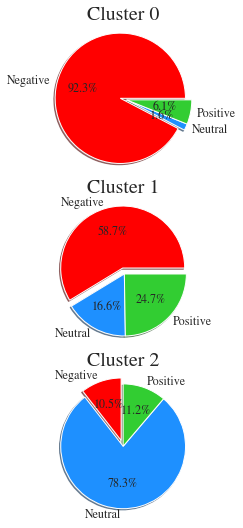

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(4,9))
pie1 = data[data['clusters'] == 0][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[0].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=0
)
ax[0].axis('equal')
ax[0].set_title('Cluster 0')

pie1 = data[data['clusters'] == 1][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[1].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=0
)
ax[1].axis('equal')
ax[1].set_title('Cluster 1')

pie1 = data[data['clusters'] == 2][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[2].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=90
)
ax[2].axis('equal')
ax[2].set_title('Cluster 2')

#pie1 = data[data['clusters'] == 3][['Analysis', 'polarity']].groupby(by='Analysis').count()
#ax[1,1].pie(
#    pie1['polarity'],
#    colors=['red', 'dodgerblue', 'limegreen'],
#    labels=pie1.index.to_list(),
#    autopct='%1.1f%%',
#    explode=[0.1,0.,0.],
#    shadow=True, startangle=0
#)
#ax[1,1].axis('equal')
#ax[1,1].set_title('Cluster 3')
fig.set_size_inches(4,9)
fig.savefig('Img/polarity_spanish.pdf', format='pdf', dpi=100);

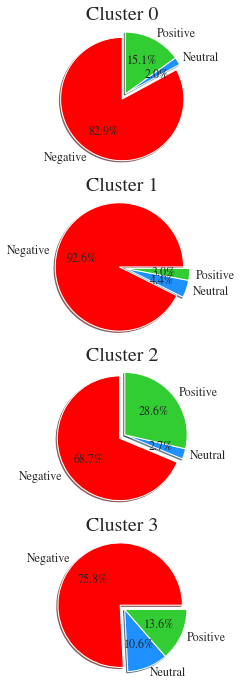

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(4,12))
pie1 = data[data['clusters'] == 0][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[0].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=90
)
ax[0].axis('equal')
ax[0].set_title('Cluster 0')

pie1 = data[data['clusters'] == 1][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[1].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=0
)
ax[1].axis('equal')
ax[1].set_title('Cluster 1')

pie1 = data[data['clusters'] == 2][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[2].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=90
)
ax[2].axis('equal')
ax[2].set_title('Cluster 2')

pie1 = data[data['clusters'] == 3][['Analysis', 'polarity']].groupby(by='Analysis').count()
ax[3].pie(
    pie1['polarity'],
    colors=['red', 'dodgerblue', 'limegreen'],
    labels=pie1.index.to_list(),
    autopct='%1.1f%%',
    explode=[0.1,0.,0.],
    shadow=True, startangle=0
)
ax[3].axis('equal')
ax[3].set_title('Cluster 3')
fig.set_size_inches(4,12)
fig.savefig('Img/polarity_nltk.pdf', format='pdf', dpi=100);

In [ ]:
data[['clusters', 'Analysis', 'polarity']].groupby(['clusters', 'Analysis']).mean()

polarity
clusters Analysis          
0        Negative -0.653989
         Neutral  -0.000022
         Positive  0.257302
1        Negative -0.895498
         Neutral  -0.005568
         Positive  0.483440
2        Negative -0.634789
         Neutral  -0.002363
         Positive  0.384840

# Grafo

In [ ]:
data[data['clusters'] == 1].sort_values(by=['polarity']).head(14)

,id_str,text,from_user,created_at,user_followers_count,user_friends_count,clean_text,translated_text,vec,clusters,polarity
3474,1453117975054192642,evil Lasso #ParoNacional https://t.co/AP0q3tJsNQ,wuwuyoda,2021-10-26 16:54:57+00:00,46,65.0,evil Lasso Paro Nacional,evil lasso national strike,"[0.05450439453125, 0.03509521484375, -0.078643...",1,-1.000000
3515,1453115738965819400,@Oliver60024638 @murillo_cabezas @Lenin #Lasso...,DigVallejo,2021-10-26 16:46:04+00:00,599,196.0,Lasso Corrupto es lo peor de lo peor.,lasso corrupto is the worst of the worst,"[0.13626607259114584, -0.012247721354166666, 0...",1,-1.000000
4343,1453070474678784006,@LassoGuillermo Miserable Evasor. #PandoraPape...,UrbanoCrisdario,2021-10-26 13:46:12+00:00,574,643.0,Guillermo Lasso Miserable Evasor. Pandora Pape...,guillermo lasso miserable evasor pandora pape...,"[0.10811360677083333, 0.01513671875, -0.256469...",1,-1.000000
2848,1453152028193087490,Terrible!! #LassoCorrupto https://t.co/8sm18hMwsX,DigVallejo,2021-10-26 19:10:16+00:00,599,196.0,Terrible!! Lasso Corrupto,terrible corrupted lasso,"[0.15388997395833334, 0.08504231770833333, -0....",1,-1.000000
4034,1453090122073845761,@LassoGuillermo se indigna de él mismo. #Lasso...,danloga14,2021-10-26 15:04:16+00:00,31,165.0,Guillermo Lasso se indigna de él mismo. Lasso ...,guillermo lasso is outraged at himself liar l...,"[0.1656867133246528, 0.001980251736111111, -0....",1,-0.900000
6972,1452910232624148481,@ToreroEdison @BlancaLopezC_ OTRO TROLL HDP PA...,marthateresa,2021-10-26 03:09:27+00:00,1962,739.0,OTRO TROLL HDP PAGADO PARA DEFENDER AL MISERAB...,another hdp troll paid to defend the miserable...,"[0.14061763368803878, -0.031625681910021554, -...",1,-0.658333
5994,1453006227118727197,"Evidencias y pruebas contundentes, hasta cuand...",Moni_mc1968,2021-10-26 09:30:54+00:00,777,1886.0,"Evidencias y pruebas contundentes, hasta cuand...",evidence and conclusive evidence until when g...,"[0.06670125325520833, -0.01790618896484375, -0...",1,-0.658333
7037,1452869614057177092,@LassoGuillermo La peor basura que pudo llegar...,vargas_tv91,2021-10-26 00:28:03+00:00,114,186.0,Guillermo Lasso La peor basura que pudo llegar...,guillermo lasso the worst garbage that could c...,"[0.1389798251065341, 0.022549715909090908, -0....",1,-0.658333
2691,1453162738419740685,Policías infiltrados ?? Guillermo Lasso dement...,Carol2311921,2021-10-26 19:52:49+00:00,143,178.0,Policías infiltrados ?? Guillermo Lasso dement...,undercover cops guillermo lasso insane psyc...,"[0.08771168101917613, -0.028195467862215908, -...",1,-0.658333
5715,1453016746424770560,@radiolacalle #LassoEsUnFracasso #LassoEvasor ...,bladescorpio,2021-10-26 10:12:42+00:00,44,235.0,Lasso es un fracaso Lasso evasor gobierno mise...,lasso is a failure lasso evader miserable gove...,"[0.14665440150669642, -0.0025809151785714285, ...",1,-0.658333


In [ ]:
edges = pd.read_csv('/content/edges.csv')
edges.head()

,Source,Target
0,DayanaSMRF,alealemend
1,LongoBello,alealemend
2,abrigo_vero,alealemend
3,Roberto31789948,alealemend
4,jean_vizueta96,alealemend


In [ ]:
nodes = list(set(edges['Source'].to_list() + edges['Target'].to_list()))
nodes = pd.DataFrame({'Id':nodes})
nodes.head()

,Id
0,nachita41
1,longacualquiera
2,LatigoPueblo
3,VivianaVeloz18
4,panchoteran


In [ ]:
def get_cluster(user):
  clusters = data[data['from_user'] == user]['clusters'].to_list()
  if clusters != []:
    df = data[data['from_user'] == 'DayanaSMRF'][['from_user', 'clusters']].groupby('clusters', as_index=False).count().sort_values(by='from_user').reset_index()
    return df['clusters'][0]
  return ''

In [ ]:
df = data[data['from_user'] == 'DayanaSMRF'][['from_user', 'clusters']].groupby('clusters', as_index=False).count().sort_values(by='from_user').reset_index()

,index,clusters,from_user
0,0,1,1


In [ ]:
nodes['clusters'] = nodes['Id'].apply(get_cluster)
nodes.head(20)

,Id,clusters
0,nachita41,
1,longacualquiera,
2,LatigoPueblo,1
3,VivianaVeloz18,1
4,panchoteran,
5,EstebanGuacales,
6,IsmaelJ64748508,
7,CampoverdePatty,
8,carlosoporto,
9,MryRodrguez4,


In [ ]:
nodes[nodes['clusters'] != '']

,Id,clusters
2,LatigoPueblo,1
3,VivianaVeloz18,1
12,MartinezMolinaM,1
13,danloga14,1
20,qrlhec,1
...,...,...
724,ismafolk,1
748,ErnstDam,1
751,Carol2311921,1
759,Laespadadeboli3,1


In [ ]:
nodes.to_csv('/content/nodes.csv', sep=',', index=False)